# Name: Wagh Vishal Karbhari
# Email_id: vishalwagh2408@gmail.com
# Mobile No: +91 7414923155

# Import all the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Read The Dataset

In [2]:
df=pd.read_table("dataframe_.csv",sep=",")
df

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


# Conclusion :

The given dataset of 1696 rows of with two columns input and output.                                                        
All the columns are of float datatype.                                                                                     
one missing value from the database.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


# Describe the dataset
In the given dataset there are altogether 1696 entries of the dataset.
The median value of dataset input is concentrated around 10.195194.
The third quartile value of dataset input is concentrated around 70.264109.
The minimum value of dataset input is concentrated around -134.962839.
The maximum value of dataset input is concentrated around 134.605775.

In [4]:
df.describe()

,input,output
count,1696.000000,1696.000000
mean,1.159933,-34.088017
std,79.005970,65.771112
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


In [5]:
df.isnull().sum()

input     1
output    1
dtype: int64

# Fill Missing Value

In [6]:
a=df["input"].mean()
df["input"].fillna(a,inplace=True)

In [7]:
b=df["output"].mean()
df["output"].fillna(b,inplace=True)

In [8]:
df.isnull().sum()

input     0
output    0
dtype: int64

In [9]:
df.notnull().sum()

input     1697
output    1697
dtype: int64

# Correlation

In [10]:
df.corr().style.background_gradient()

,input,output
input,1.000000,0.511776
output,0.511776,1.000000


# Outlier

<AxesSubplot:xlabel='input', ylabel='output'>

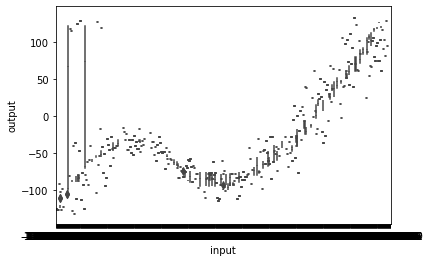

In [11]:
sns.boxplot(data=df,x="input",y="output")

In [12]:
columnname=df.select_dtypes(["int64","float64"])
columnname

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


# Split the Data

In [13]:
#x=df.iloc[:,0]
x=df[["input"]]
x

,input
0,-122.740667
1,-121.531419
2,-134.917019
3,-120.605951
4,-129.894781
...,...
1692,25.410184
1693,29.537304
1694,31.633331
1695,29.091458


In [14]:
y=df.iloc[:,1]
y

0      -130.572085
1      -129.938929
2      -130.141832
3      -125.760932
4      -112.785214
           ...    
1692    -76.380902
1693    -82.796934
1694    -87.000000
1695   -104.943052
1696   -101.726894
Name: output, Length: 1697, dtype: float64

# Apply Algorithm In Dataset

In [15]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

# Import The Model

In [16]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(xtrain,ytrain)
ypred=linreg.predict(xtest)

# Model Performance on Training Set

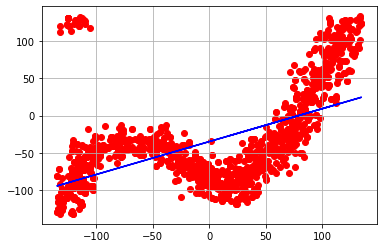

In [17]:
plt.scatter(xtrain,ytrain,color="red")
plt.plot(xtrain,linreg.predict(xtrain),color="blue")
plt.grid()
plt.show()

# Model performance on Testing Data

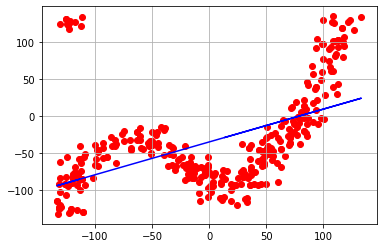

In [18]:
plt.scatter(xtest,ytest,color="red")
plt.plot(xtest,linreg.predict(xtest),color="blue")
plt.grid()
plt.show()

# Model Evaluation

In [19]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [20]:
mae=mean_absolute_error(ytest,ypred)
mse=mean_squared_error(ytest,ypred)
rmse=np.sqrt(mse)
r2=r2_score(ytest,ypred)

print(f" MAE:- {mae}\n MSE:- {mse}\n RMSE:- {rmse}\n Accurracy:- {r2}")

 MAE:- 43.75505494407139
 MSE:- 3680.119069288378
 RMSE:- 60.66398494402076
 Accurracy:- 0.16772039567743957


# Model Testing on new observation

In [21]:
def makeprediction():
    newobs=float(input("Enter a no:"))
    yp=linreg.predict([[newobs]])[0]
    print(f"Actual value is {newobs} and new observation is {yp:5f}")
    return yp
makeprediction()

Enter a no:5.5
Actual value is 5.5 and new observation is -32.547405


-32.54740509103602

# Apply The PolynomialRegression

In [22]:
from sklearn.preprocessing import PolynomialFeatures

In [23]:
pf=PolynomialFeatures(degree=2)

In [24]:
xp=pf.fit_transform(x)

In [25]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(xp,y)
ypred=linreg.predict(xp)

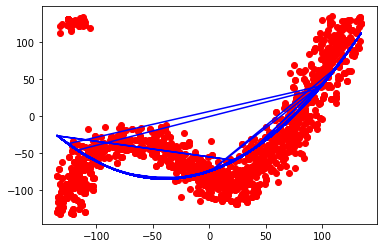

In [26]:
plt.scatter(x,y,color="red")
plt.plot(x,ypred,color="blue")